### `Principal Component Analysis`

Principal Component Analysis (PCA) is a multivariate analysis technique used to identify patterns and relationships between variables in a complex dataset. PCA takes a group of variables and transforms them into a new set of linearly independent components called principal components. Each principal component is a linear combination of the original variables and is ordered by the amount of variance explained by each component.

The basic concept of PCA is to reduce the dimensionality of variables in a complex dataset by transforming them into linearly independent principal components. PCA takes a data matrix consisting of n observations and p variabvles, the perform a linear transformation on the data to produce a number of new principal components that can describe most of the variability in the dataset.

Mathematically, PCA works by performing singular value decomposition (SVD) on a data matrix, resulting in a matrix of principal component factors. These principal components are ordered by the amount of variance explained by each component, and can be used to represent the data in a simpler and more efficient space.

In practice, PCA is used to speed up data analysis by eliminating unimportant variables and identifying relationships between existing variables. In this sense, PCA helps clarify the structure in complex data and allow researchers to make more precise and effective conclusions.

#### **Example: Breast Cancer Dataset**

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
data = pd.DataFrame(data = cancer['data'],columns=cancer['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 30)

#### **Building a PCA using** `scikit-learn`

We now have all of the pieces to make a PCA using scikit learn library.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [5]:
pca = PCA(n_components=30)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_pca.shape

(569, 30)

We initialize sklearn.decomposition.PCA and instruct it to extract all principal components

In [6]:
pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [7]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

We can then already print information about the analysis:

In [8]:
df_variance = pd.DataFrame({
    'PC' : range(30),
    'Variance Ratio' : pca.explained_variance_ratio_,
    'Cumulative Variance' : pca.explained_variance_ratio_.cumsum(),
})
df_variance.head()

,PC,Variance Ratio,Cumulative Variance
0,0,0.442720,0.442720
1,1,0.189712,0.632432
2,2,0.093932,0.726364
3,3,0.066021,0.792385
4,4,0.054958,0.847343


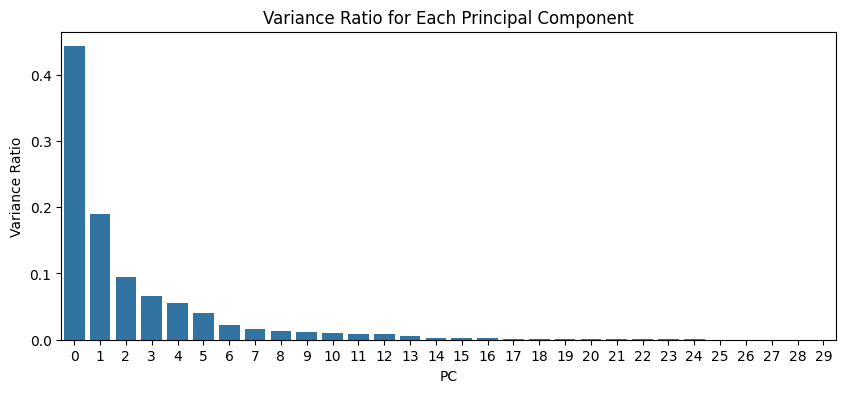

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.barplot(data=df_variance, x='PC',y='Variance Ratio')
plt.title('Variance Ratio for Each Principal Component')
plt.show()

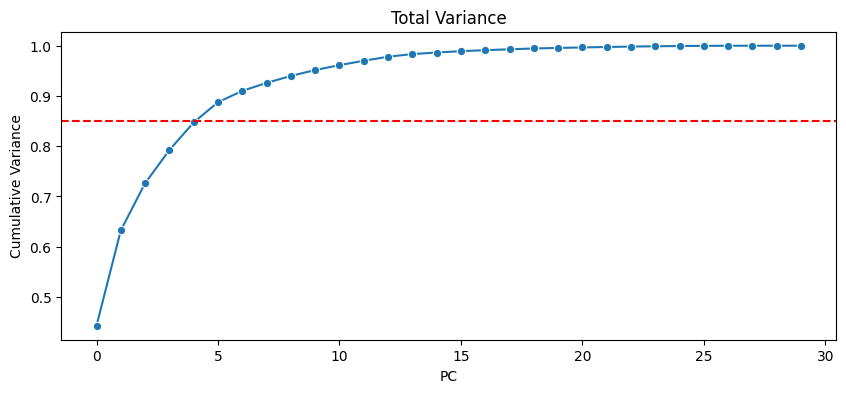

In [10]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_variance, x='PC',y='Cumulative Variance',marker='o')
plt.axhline(y=0.85, color='red',linestyle='--')
plt.title('Total Variance')
plt.show()

The first 5 Principal Components (PC0 - PC4) store 84.7% of the information (variance) from the initial data we have (30 features) while the first 2 Principal Components store 63.24% of the information. 

Now we will try to extract two principal components to make data visualization easier.

In [11]:
pca_2comp = PCA(n_components=3)
pca_2comp.fit(X_scaled)

X_pca_2comp = pca_2comp.transform(X_scaled)
X_pca_2comp.shape

(569, 3)

In [12]:
pca_2comp.explained_variance_ratio_.sum()

np.float64(0.7263637090899084)

We can now easily project the data onto the principal components with .transform(X), then visualizing the data.

In [13]:
pc0 = X_pca_2comp[:,0]
pc1 = X_pca_2comp[:,1]
pc2 = X_pca_2comp[:,2]

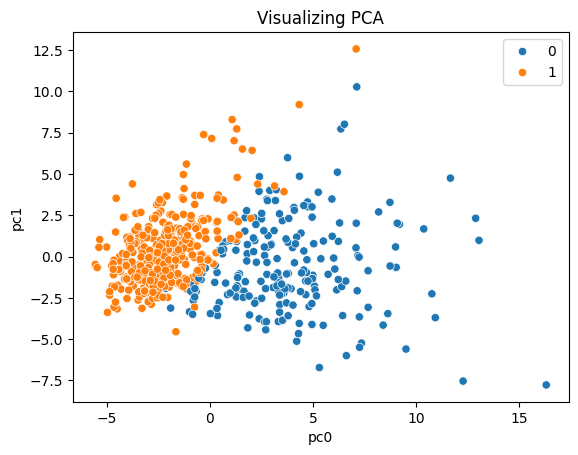

In [14]:
sns.scatterplot(x=pc0,y=pc1,hue=cancer['target'])
plt.title('Visualizing PCA')
plt.xlabel('pc0')
plt.ylabel('pc1')
plt.show()

**Insight**


- Information (variance) stored in the 2 PCs above is 63.24%
- We reduce the number of dimensions (columns) from 30 to 2 dimensions, so we lose 36.76% of the information from the initial data
- But by only using 2 PCs, we can quite differentiate between malignant and benign cancer
- With 2 PCs, we can visualize with a scatterplot
- PCA can capture hidden patterns
- PCA can also eliminate multicollinearity

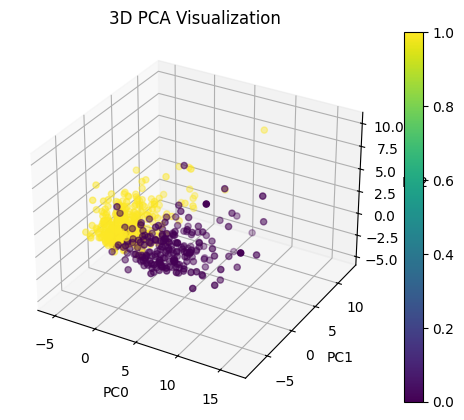

In [15]:
# Cuma untuk test saja, ternyata lebih baik menggunakan scatterplot 2D
from mpl_toolkits.mplot3d import Axes3D
pd.DataFrame(X_pca_2comp).corr()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
sc = ax.scatter(pc0, pc1, pc2, c=cancer['target'], cmap='viridis')

# Add labels and title
ax.set_title('3D PCA Visualization')
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')

# Add color bar
plt.colorbar(sc)

# Show plot
plt.show()


Then we can look at the coefficients of PC0 and PC1 and determine the important features of each component

In [16]:
pd.DataFrame({
    'Feature' : X.columns,
    'Coef PC0' : pca_2comp.components_[0],
    'Coef PC1' : pca_2comp.components_[1]
}).sort_values('Coef PC0',ascending=False)

,Feature,Coef PC0,Coef PC1
7,mean concave points,0.260854,-0.034768
6,mean concavity,0.258400,0.060165
27,worst concave points,0.250886,-0.008257
5,mean compactness,0.239285,0.151892
22,worst perimeter,0.236640,-0.199878
26,worst concavity,0.228768,0.097964
20,worst radius,0.227997,-0.219866
2,mean perimeter,0.227537,-0.215181
23,worst area,0.224871,-0.219352
3,mean area,0.220995,-0.231077
